1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition: 
 [[-0.11483487 -0.81649658  0.56581471]
 [-0.57814379 -0.40824829 -0.70645813]
 [-0.80781354  0.40824829  0.42517129]]
SVD decomposition; 
 [[-0.11483487  0.56581471 -0.81649658]
 [-0.57814379 -0.70645813 -0.40824829]
 [-0.80781354  0.42517129  0.40824829]]
Variance of the principal components:
 [9.25893179e-01 7.41068207e-02 2.25445128e-17]


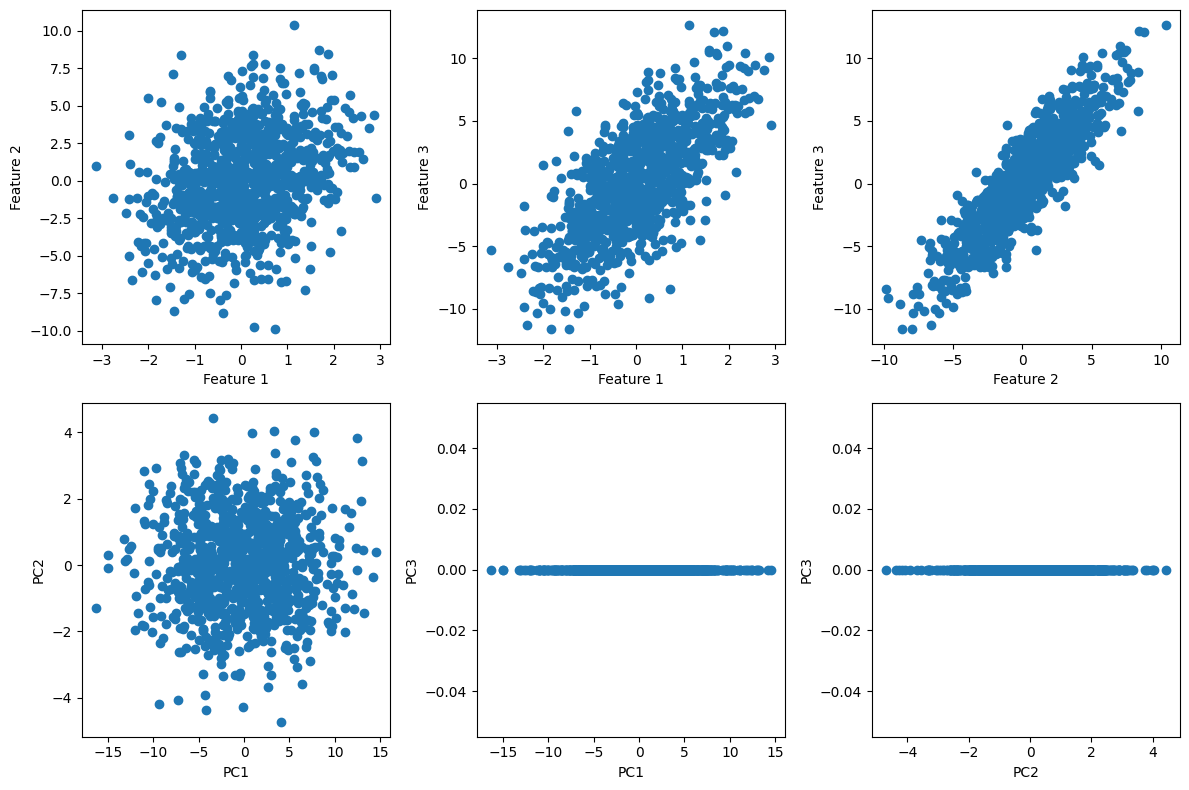

In [6]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Set the number of entries
N = 1000

# Set the means and standard deviations
mean = [0, 0, 0]
std = [1, 3, 1]

# Generate the three features
x1 = np.random.normal(mean[0], std[0], N)
x2 = x1 + np.random.normal(mean[1], std[1], N)
x3 = 2 * x1 + x2

# Create the dataset
dataset = pd.DataFrame({'Feature 1': x1, 'Feature 2': x2, 'Feature 3': x3})

# Calculate the covariance matrix
cov_matrix = dataset.cov()

# Perform eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Perform singular value decomposition
U, S, Vt = svd(cov_matrix)

# Since S contains the square root of eigenvalues[cov_matrix @ cov_matrix.T]
# and since cov_matrix is symmetric, eigenvalues[cov_matrix @ cov_matrix.T] are
# equals to (eigenvalues[cov_matrix] ** 2)

# So basically in S we can find eigevalues of the original matrix, but without
# their original sign, because of the elevation at the power of two
svd_eigenvalues = S
svd_eigenvectors = U

# Check if eigendecomposition and SVD yield the same results
print("Eigendecomposition: \n", eigenvectors)  
print("SVD decomposition; \n", svd_eigenvectors)

# Calculate the percentage of total variability explained by principal components
explained_variance_ratio = svd_eigenvalues / np.sum(svd_eigenvalues)
print("Variance of the principal components:\n", explained_variance_ratio)

# Reduce dimensionality to retain at least 99% of total variability
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

reduced_eigenvectors = svd_eigenvectors.copy()
reduced_eigenvectors[:, num_components] = 0
reduced_dataset = np.dot(dataset, reduced_eigenvectors)

# Plot the data in both the original and new basis
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original basis: [Feature 1, Feature 2]
axs[0, 0].scatter(dataset['Feature 1'], dataset['Feature 2'])
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')

# Original basis: [Feature 1, Feature 3]
axs[0, 1].scatter(dataset['Feature 1'], dataset['Feature 3'])
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].set_ylabel('Feature 3')

# Original basis: [Feature 2, Feature 3]
axs[0, 2].scatter(dataset['Feature 2'], dataset['Feature 3'])
axs[0, 2].set_xlabel('Feature 2')
axs[0, 2].set_ylabel('Feature 3')

# New basis: [PC1, PC2]
axs[1, 0].scatter(reduced_dataset[:, 0], reduced_dataset[:, 1])
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')

# New basis: [PC1, PC3]
axs[1, 1].scatter(reduced_dataset[:, 0], reduced_dataset[:, 2])
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC3')

# New basis: [PC2, PC3]
axs[1, 2].scatter(reduced_dataset[:, 1], reduced_dataset[:, 2])
axs[1, 2].set_xlabel('PC2')
axs[1, 2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigendecomposition: 
 [2.59446578e+01 6.49281264e-16 2.14402076e+00]
SVD decomposition; 
 [2.59446578e+01 2.14402076e+00 8.50020602e-16]
Variance of the principal components:
 [9.23669575e-01 7.63304245e-02 3.02620360e-17]


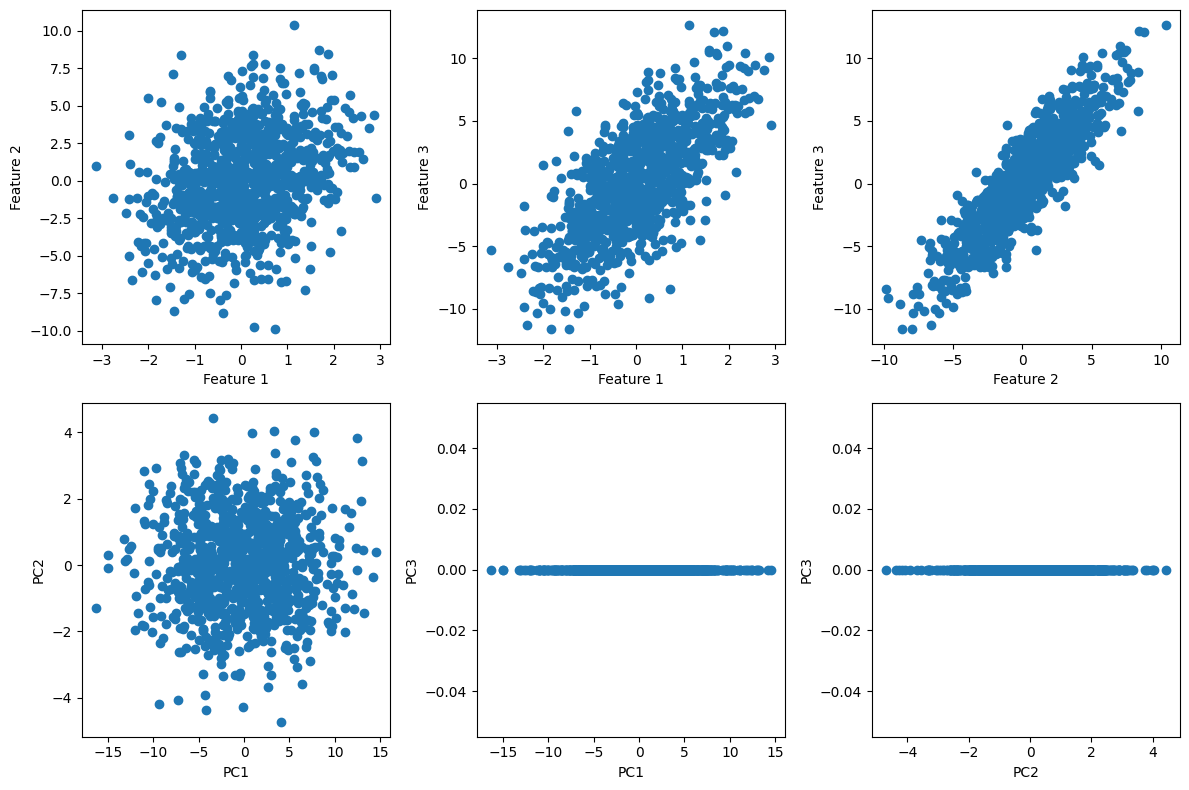

In [7]:
# Generate the uncorrelated random noise variables 
size = (1000, 10)
w1 = np.random.normal(0, 1/20, size)
w1 = w1.sum(axis=1)
x1 = x1 + w1
w2 = np.random.normal(0, 3/20, size)
w2 = w2.sum(axis=1)
x2 = x2 + w2
x3 = 2*x1 + x2

# Create the dataset
dataframe = pd.DataFrame({'Feature 1': x1, 'Feature 2': x2, 'Feature 3': x3})

# Calculate the covariance matrix
cov_matrix = dataframe.cov()

# Perform eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Perform singular value decomposition
U, S, Vt = svd(cov_matrix)

# Since S contains the square root of eigenvalues[cov_matrix @ cov_matrix.T]
# and since cov_matrix is symmetric, eigenvalues[cov_matrix @ cov_matrix.T] are
# equals to (eigenvalues[cov_matrix] ** 2)

# So basically in S we can find eigevalues of the original matrix, but without
# their original sign, because of the elevation at the power of two
svd_eigenvalues = S
svd_eigenvectors = U

# Check if eigendecomposition and SVD yield the same results
print("Eigendecomposition: \n", eigenvalues)  
print("SVD decomposition; \n", svd_eigenvalues)

# Calculate the percentage of total variability explained by principal components
explained_variance_ratio = svd_eigenvalues / np.sum(svd_eigenvalues)
print("Variance of the principal components:\n", explained_variance_ratio)

# Reduce dimensionality to retain at least 99% of total variability
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

reduced_eigenvectors = svd_eigenvectors.copy()
reduced_eigenvectors[:, num_components] = 0

# Plot the data in both the original and new basis
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original basis: [Feature 1, Feature 2]
axs[0, 0].scatter(dataset['Feature 1'], dataset['Feature 2'])
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')

# Original basis: [Feature 1, Feature 3]
axs[0, 1].scatter(dataset['Feature 1'], dataset['Feature 3'])
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].set_ylabel('Feature 3')

# Original basis: [Feature 2, Feature 3]
axs[0, 2].scatter(dataset['Feature 2'], dataset['Feature 3'])
axs[0, 2].set_xlabel('Feature 2')
axs[0, 2].set_ylabel('Feature 3')

# New basis: [PC1, PC2]
axs[1, 0].scatter(reduced_dataset[:, 0], reduced_dataset[:, 1])
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')

# New basis: [PC1, PC3]
axs[1, 1].scatter(reduced_dataset[:, 0], reduced_dataset[:, 2])
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC3')

# New basis: [PC2, PC3]
axs[1, 2].scatter(reduced_dataset[:, 1], reduced_dataset[:, 2])
axs[1, 2].set_xlabel('PC2')
axs[1, 2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

# Results are very similar so the zero mean noise is not so influent

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 